## ANALYZING THE CONTENT OF CSV FILE TO ANSWER THE BELOW QUESTIONS

1.Which president has the most vocabulary, as evident from their inaugural speeches, and which president has the least
vocabulary? On average, do Democratic, Republican, or Other presidents have a higher vocabulary?

#### CLEAN/PREPROCESS DATA

In [1]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Loading file
df = pd.read_csv('presidential_speeches_merged.csv')
def preprocess(text):
    # preprocessing the text
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if len(word) > 1]
    stop_words = stopwords.words('english')
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

df['processed_speech'] = df['speech'].apply(preprocess)
print(df['processed_speech'].head())

[nltk_data] Downloading package punkt to C:\Users\Mounica
[nltk_data]     Pothureddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mounica
[nltk_data]     Pothureddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mounica
[nltk_data]     Pothureddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [president, hello, poland, one, great, ally, p...
1    [speaker, madam, vice, president, first, lady,...
2    [thank, president, fellow, leader, last, year,...
3    [president, fellow, american, please, seat, ta...
4    [good, evening, fellow, american, hoped, becam...
Name: processed_speech, dtype: object


In [2]:
# Filter rows with "inaugural" keyword in the title column
inaugural_df = df[df['title'].str.contains('inaugural', case=False)].copy()

In [3]:
# vocabulary size for each speech
inaugural_df['vocabulary_size'] = inaugural_df['processed_speech'].apply(lambda tokens: len(set(tokens)))

# president with the most vocabulary
most_vocabulary_president = inaugural_df[inaugural_df['vocabulary_size'] == inaugural_df['vocabulary_size'].max()]

# president with the least vocabulary
least_vocabulary_president = inaugural_df[inaugural_df['vocabulary_size'] == inaugural_df['vocabulary_size'].min()]

print("President with the Most Vocabulary:\n")
print(most_vocabulary_president[['name','vocabulary_size']])

print("\nPresident with the Least Vocabulary:\n")
print(least_vocabulary_president[['name', 'vocabulary_size']])

President with the Most Vocabulary:

                 name  vocabulary_size
960  William Harrison             1557

President with the Least Vocabulary:

                   name  vocabulary_size
1081  George Washington               55


In [4]:
high_vocab=inaugural_df.groupby('political party')['vocabulary_size'].mean()
print(high_vocab)
party_grp=high_vocab.idxmax()
party_vocab=high_vocab.max()
print(f"high vocabulary :{party_grp},{party_vocab}")

political party
Democratic               602.680000
Democratic-Republican    651.833333
Federalist               403.000000
National Republican      811.000000
Republican               698.000000
Whig                     977.500000
Name: vocabulary_size, dtype: float64
high vocabulary :Whig,977.5


The most vocabulary president is William Harrison and least vocabulary president is George Washington and Whing party
has high vocabulary on a average

2. Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Biden) 
in chronological order. Color code this barplot as blue for Democrat, red for Republican, and gray for Others. 

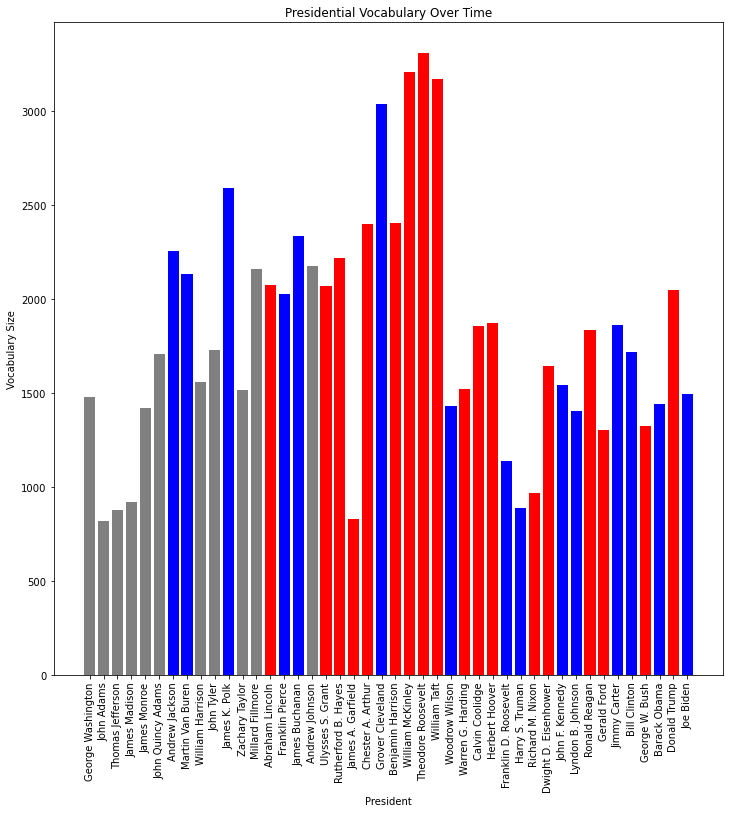

In [5]:
# bar plot from earliest to latest president sorted by date
import matplotlib.pyplot as plt
import pandas as pd

df['vocabulary_size'] = df['processed_speech'].apply(lambda tokens: len(set(tokens)))
df['political_party_category'] = df['political party'].apply(lambda x:'Others'  if x not in ['Democratic','Republican'] else x)

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
party_colors = {
    'Democratic': 'blue',
    'Republican': 'red',
    'Others':'gray'
}


plt.figure(figsize=(12, 12))
plt.bar(df['name'], df['vocabulary_size'], color=df['political_party_category'].map(party_colors))
plt.xlabel('President')
plt.ylabel('Vocabulary Size')
plt.title('Presidential Vocabulary Over Time')
plt.xticks(rotation=90)
plt.show()

3. What are the five most frequently used words (exclusive of stop words) used by each president? What are the five most
frequently words used collectively by all Democratic presidents versus Republican presidents?

In [6]:
# grouping by name and aggregating all the speech 
president_grp=df.groupby(['name']).agg({'processed_speech':sum}).reset_index()

In [7]:
def  count_freq(tokens):
    token_freq = {}                              # creat an empty dictionary
    for token in tokens:                         # for each word in the list of words
        token_freq[token] = token_freq.get(token, 0) + 1  
    word_freq = []                      # create an empty list
    for key, value in token_freq.items():     # iterate through the key value pairs in the dictionary
        word_freq.append((value, key))  # append a tuple of (value, key) to word_freq list.
        
    word_freq.sort(reverse=True)

    top5_words = word_freq[0:5]   # slice the first 20 words

    values, labels = zip(*top5_words) # unzip the list of tuples into two tuples
    return labels


In [8]:
# getting most_freq words
president_grp["most_freq"]=president_grp['processed_speech'].apply(count_freq)
president_grp

name                                   processed_speech  \
0         Abraham Lincoln  [honor, henry, clayon, fourth, day, july, peop...   
1          Andrew Jackson  [undertake, arduous, duty, appointed, perform,...   
2          Andrew Johnson  [gentleman, must, permitted, say, almost, over...   
3            Barack Obama  [chairman, dean, great, friend, dick, durbin, ...   
4       Benjamin Harrison  [constitutional, legal, requirement, president...   
5            Bill Clinton  [fellow, citizen, today, celebrate, mystery, a...   
6         Calvin Coolidge  [since, close, last, congress, nation, lost, p...   
7       Chester A. Arthur  [fourth, time, history, republic, chief, magis...   
8            Donald Trump  [chief, justice, robert, president, carter, pr...   
9    Dwight D. Eisenhower  [friend, begin, expression, thought, deem, app...   
10  Franklin D. Roosevelt  [president, hoover, chief, justice, friend, da...   
11        Franklin Pierce  [countryman, relief, feel, heart, know, person...   
12         George W. Bush  [president, clinton, distinguished, guest, fel...   
13      George Washington  [fellow, citizen, senate, house, representativ...   
14            Gerald Ford  [chief, justice, dear, friend, fellow, america...   
15       Grover Cleveland  [presence, vast, assemblage, countryman, about...   
16        Harry S. Truman  [speaker, president, member, congress, heavy, ...   
17         Herbert Hoover  [campaign, draw, near, close, platform, two, p...   
18      James A. Garfield  [stand, upon, eminence, overlook, hundred, yea...   
19         James Buchanan  [appear, day, take, solemn, oath, faithfullyex...   
20          James K. Polk  [fellow, citizen, without, solicitation, part,...   
21          James Madison  [unwilling, depart, example, revered, authorit...   
22           James Monroe  [destitute, feeling, deeply, affected, strong,...   
23           Jimmy Carter  [edwin, newman, moderator, first, debate, camp...   
24              Joe Biden  [chief, justice, robert, vice, president, harr...   
25             John Adams  [first, perceived, early, time, middle, course...   
26        John F. Kennedy  [governor, stevenson, senator, johnson, butler...   
27      John Quincy Adams  [friend, countryman, wise, learned, philosophe...   
28             John Tyler  [people, united, state, arrival, seat, governm...   
29      Lyndon B. Johnson  [hallowed, ground, heroic, deed, performed, el...   
30       Martin Van Buren  [practice, predecessor, imposes, obligation, c...   
31       Millard Fillmore  [senate, house, representative, herewith, tran...   
32       Richard M. Nixon  [fellow, american, come, tonight, candidate, v...   
33          Ronald Reagan  [thank, thank, much, thank, good, evening, spo...   
34    Rutherford B. Hayes  [assembled, repeat, public, ceremonial, begun,...   
35     Theodore Roosevelt  [president, united, state, america, proclamati...   
36       Thomas Jefferson  [friend, called, upon, undertake, duty, first,...   
37       Ulysses S. Grant  [citizen, united, state, suffrage, elected, of...   
38      Warren G. Harding  [countryman, surpassing, war, time, involved, ...   
39       William Harrison  [called, retirement, supposed, continue, resid...   
40       William McKinley  [obedience, people, presence, theauthority, ve...   
41           William Taft  [anyone, taken, oath, taken, must, feel, heavy...   
42         Woodrow Wilson  [change, government, began, two, year, ago, wh...   
43         Zachary Taylor  [elected, american, people, highest, office, k...   

                                            most_freq  
0                 (state, slavery, would, slave, one)  
1             (state, government, power, may, united)  
2      (state, united, government, law, constitution)  
3               (applause, people, american, u, year)  
4             (state, government, upon, year, united)  
5             (people, american, year, must, america)  
6          (government, coun

In [9]:
# grouping by party and aggregating all the speech
party_grp=df.groupby(['political_party_category']).agg({'processed_speech':sum}).reset_index()
party_grp

political_party_category                                   processed_speech
0               Democratic  [undertake, arduous, duty, appointed, perform,...
1                   Others  [fellow, citizen, senate, house, representativ...
2               Republican  [honor, henry, clayon, fourth, day, july, peop...

In [10]:
# getting most_freq words for party
party_grp["most_freq"]=party_grp['processed_speech'].apply(count_freq)
party_grp

political_party_category                                   processed_speech  \
0               Democratic  [undertake, arduous, duty, appointed, perform,...   
1                   Others  [fellow, citizen, senate, house, representativ...   
2               Republican  [honor, henry, clayon, fourth, day, july, peop...   

                                     most_freq  
0     (state, people, government, year, would)  
1   (state, united, government, may, congress)  
2  (state, government, people, year, american)

4. What are the key themes (e.g., freedom, liberty, country, etc.) used by each president in their inaugural speech?

In [11]:
president_keythemes=inaugural_df.groupby(['name']).agg({'processed_speech':sum}).reset_index()
president_keythemes

name                                   processed_speech
0         Abraham Lincoln  [second, appearing, take, oath, presidential, ...
1          Andrew Jackson  [fellow, citizen, american, people, expressed,...
2            Barack Obama  [vice, president, biden, chief, justice, membe...
3       Benjamin Harrison  [constitutional, legal, requirement, president...
4            Bill Clinton  [fellow, citizen, last, presidential, inaugura...
5         Calvin Coolidge  [countryman, one, contemplate, current, condit...
6            Donald Trump  [chief, justice, robert, president, carter, pr...
7    Dwight D. Eisenhower  [chairman, vice, president, chief, justice, sp...
8   Franklin D. Roosevelt  [chief, justice, vice, president, friend, unde...
9         Franklin Pierce  [countryman, relief, feel, heart, know, person...
10         George W. Bush  [vice, president, cheney, chief, justice, pres...
11      George Washington  [called, upon, voice, country, execute, functi...
12       Grover Cleveland  [obedience, mandate, countryman, dedicatemysel...
13        Harry S. Truman  [vice, president, chief, justice, fellow, citi...
14         Herbert Hoover  [countryman, occasion, alone, administration, ...
15      James A. Garfield  [stand, upon, eminence, overlook, hundred, yea...
16         James Buchanan  [appear, day, take, solemn, oath, faithfullyex...
17          James K. Polk  [fellow, citizen, without, solicitation, part,...
18          James Madison  [add, solemnity, oath, obligation, imposed, se...
19           James Monroe  [shall, attempt, describe, grateful, emotion, ...
20           Jimmy Carter  [nation, want, thank, predecessor, done, heal,...
21              Joe Biden  [chief, justice, robert, vice, president, harr...
22             John Adams  [first, perceived, early, time, middle, course...
23        John F. Kennedy  [vice, president, johnson, speaker, chief, jus...
24      John Quincy Adams  [compliance, usage, coeval, existence, federal...
25      Lyndon B. Johnson  [fellow, countryman, occasion, oath, taken, go...
26       Martin Van Buren  [practice, predecessor, imposes, obligation, c...
27       Richard M. Nixon  [vice, president, speaker, chief, justice, sen...
28          Ronald Reagan  [senator, mathias, chief, justice, burger, vic...
29    Rutherford B. Hayes  [assembled, repeat, public, ceremonial, begun,...
30     Theodore Roosevelt  [people, earth, cause, thankfulthan, said, rev...
31       Thomas Jefferson  [proceeding, fellow, citizen, qualification, c...
32       Ulysses S. Grant  [providence, called, second, time, act, execut...
33      Warren G. Harding  [countryman, one, survey, world, great, storm,...
34       William Harrison  [called, retirement, supposed, continue, resid...
35       William McKinley  [assembled, march, great, anxietywith, regard,...
36           William Taft  [anyone, taken, oath, taken, must, feel, heavy...
37         Woodrow Wilson  [fellow, citizen, four, year, elapsed, since, ...
38         Zachary Taylor  [elected, american, people, highest, office, k...

In [12]:
def create_wordcloud(tokens):
    token_freq = {}                              # creat an empty dictionary
    for token in tokens:                         # for each word in the list of words
        token_freq[token] = token_freq.get(token, 0)+1
    return token_freq
president_keythemes["tokenfreq"]=president_keythemes['processed_speech'].apply(create_wordcloud)

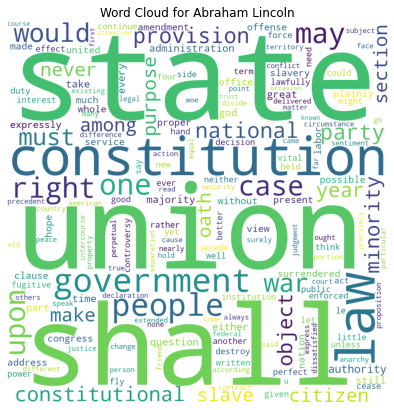

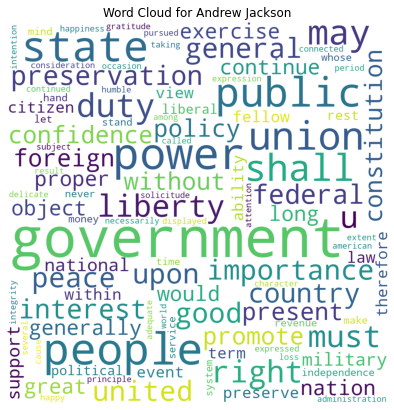

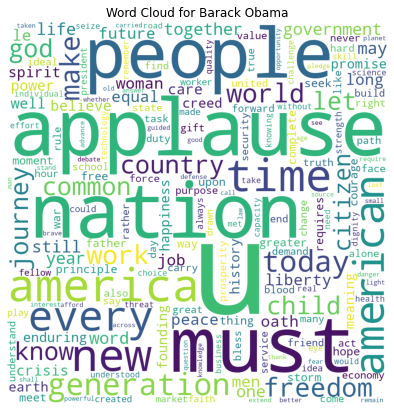

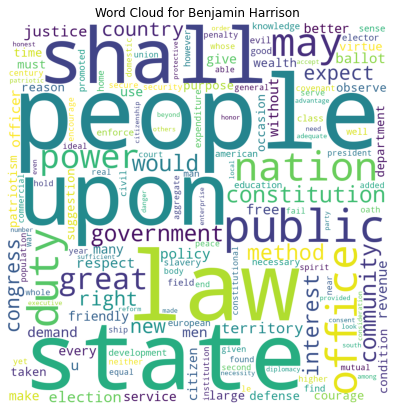

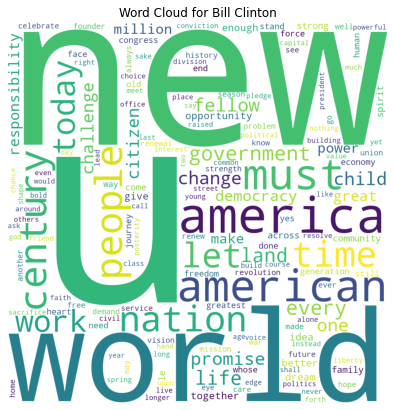

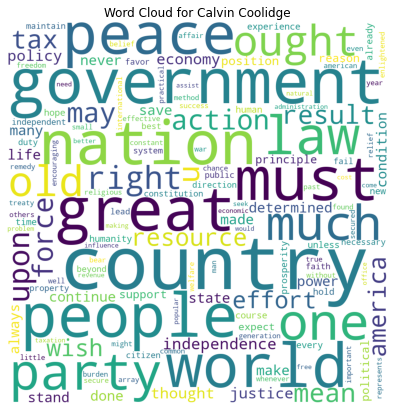

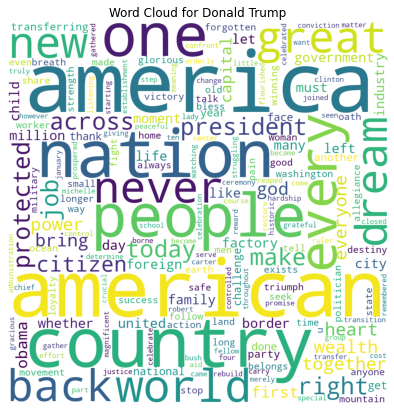

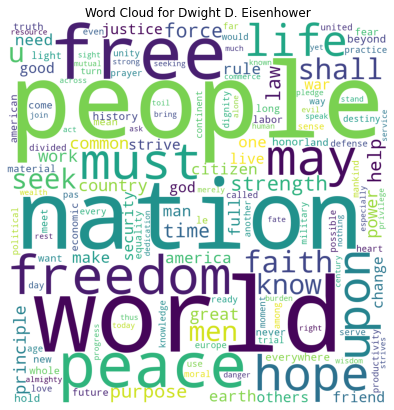

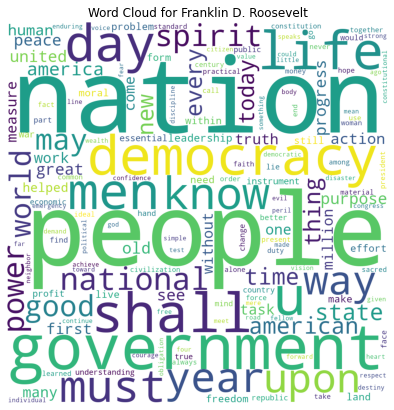

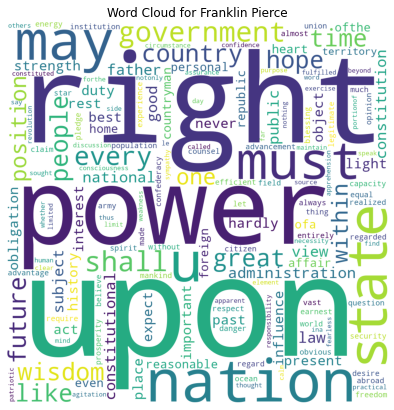

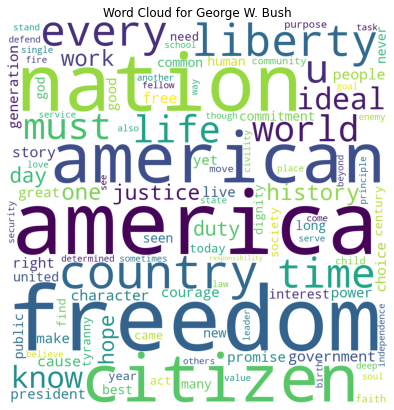

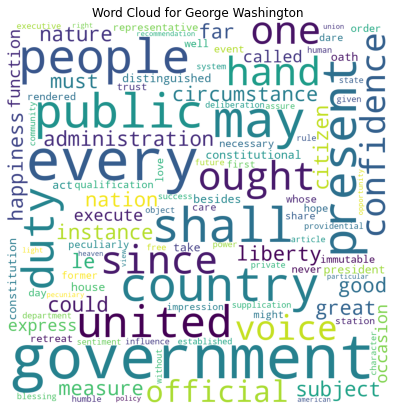

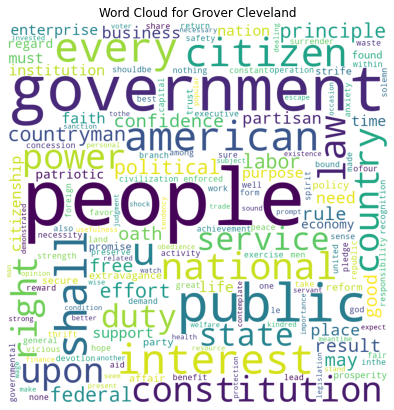

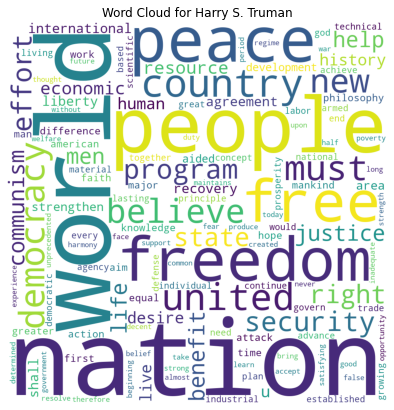

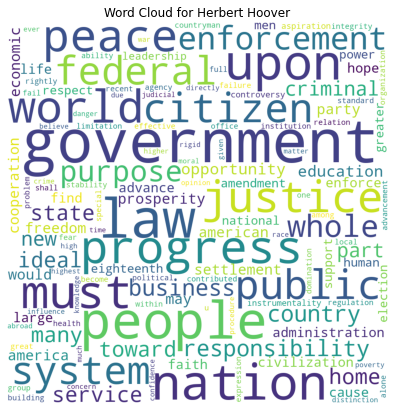

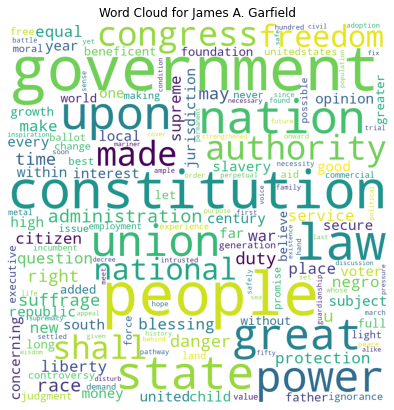

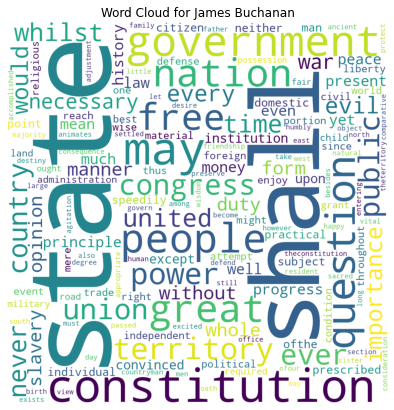

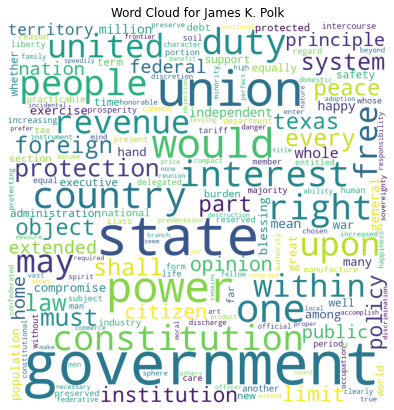

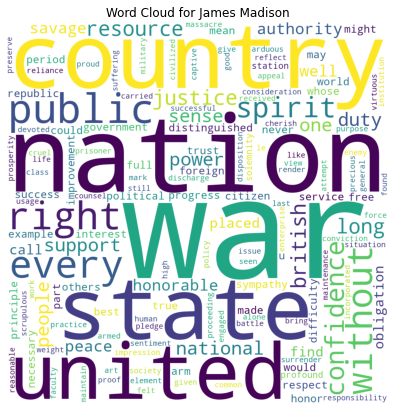

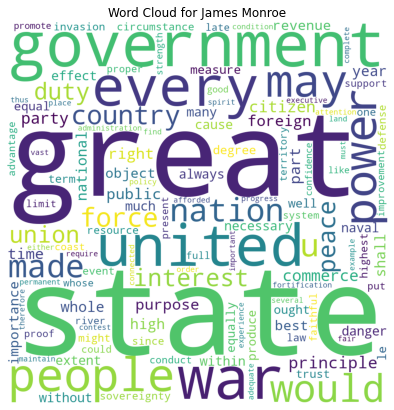

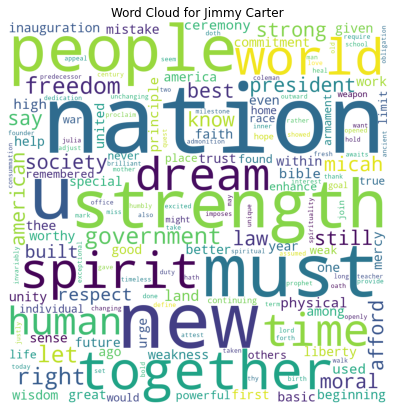

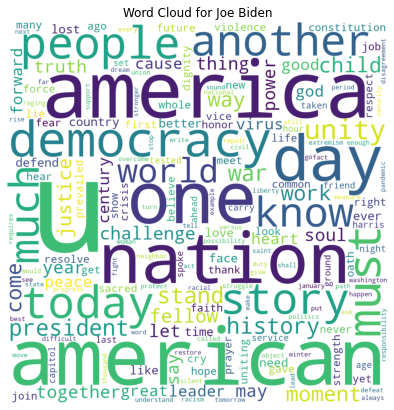

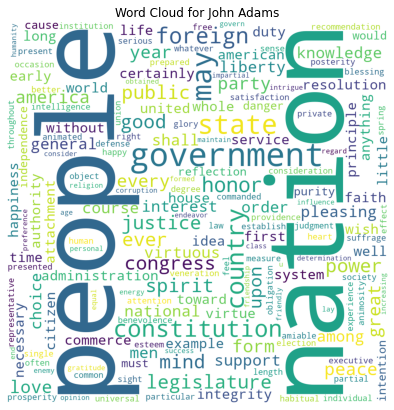

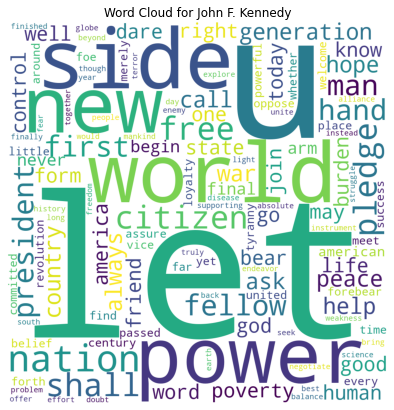

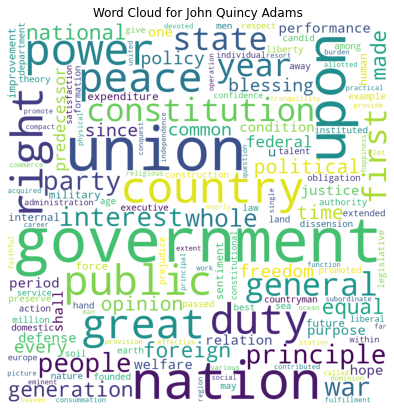

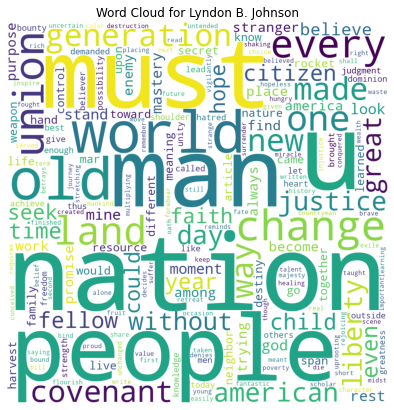

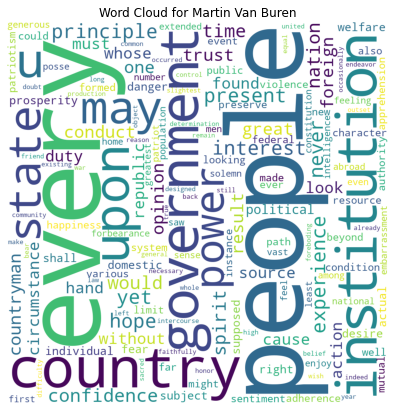

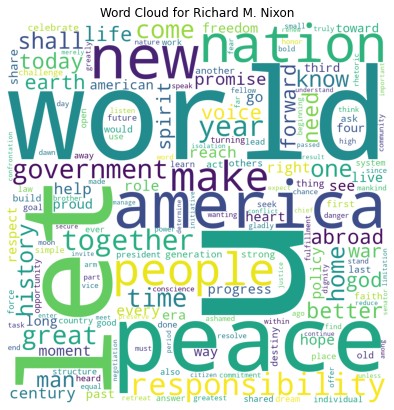

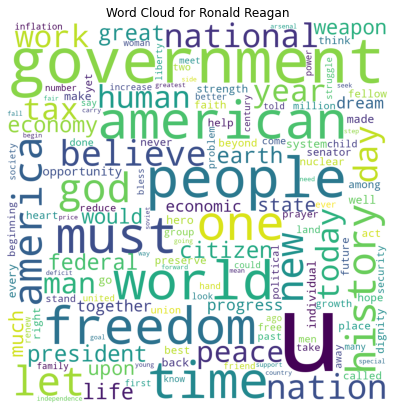

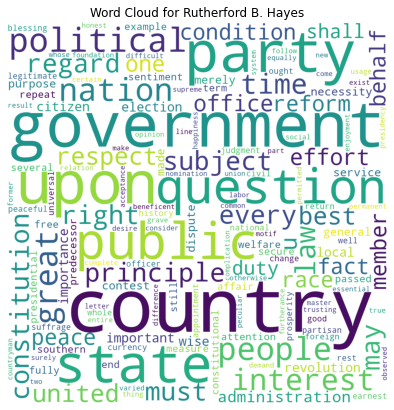

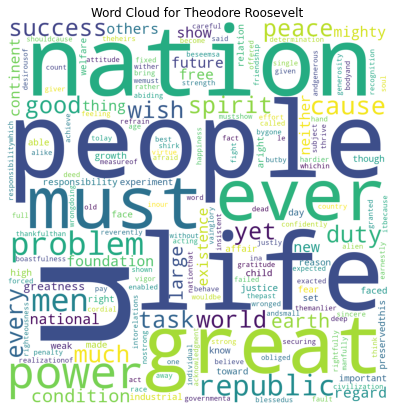

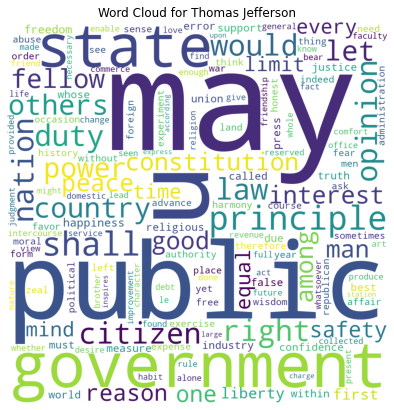

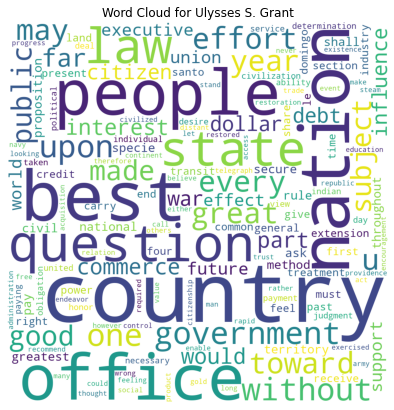

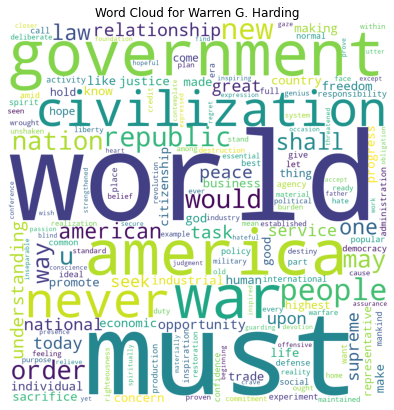

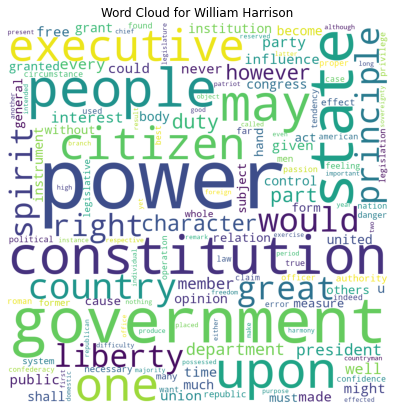

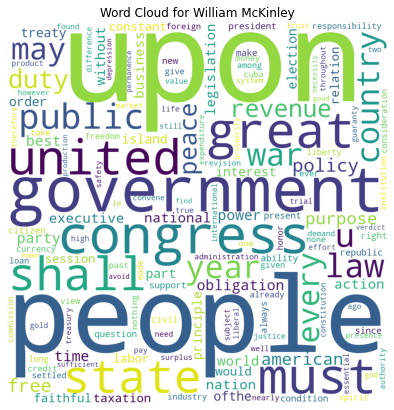

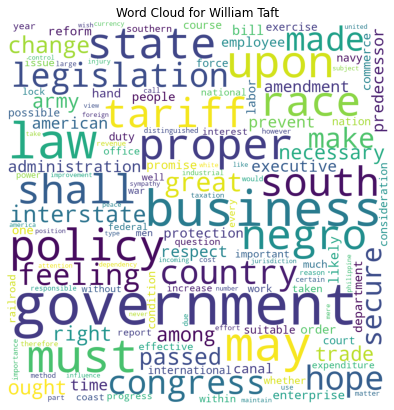

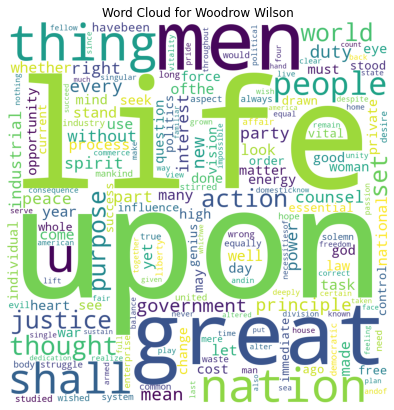

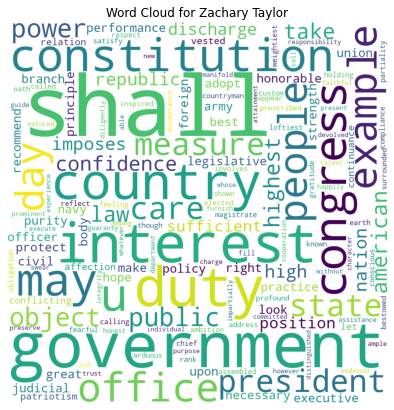

In [14]:
# iterating and getting wordcloud for each president to know the key themes they used
from wordcloud import WordCloud
for i,j in president_keythemes.iterrows():
    wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    collocations='FALSE', 
    min_font_size=16
    )
    wordcloud.generate_from_frequencies(j['tokenfreq'])
    plt.figure(figsize = (7,7))
    plt.imshow(wordcloud)
    plt.title(f"Word Cloud for {j['name']}")
    plt.axis("off")
    plt.show()


5. Compute a sentiment (positive/negative) for each presidential speech, and draw a barplot of the sentiment of all
presidential speeches in chronological order. Again, color code the speeches as blue for Democrat, red for Republican, 
and gray for Other. Which of these groups have higher mean sentiment score? Who are the top three presidents with the 
highest positive sentiment in each group?

In [17]:
# calculating sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def calculate_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

df['sentiment_score'] = df['speech'].apply(calculate_sentiment)

[nltk_data] Downloading package vader_lexicon to C:\Users\Mounica
[nltk_data]     Pothureddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# concatinating the name of president and date
df['date_name']=df['name']+" "+df['date'].astype(str)

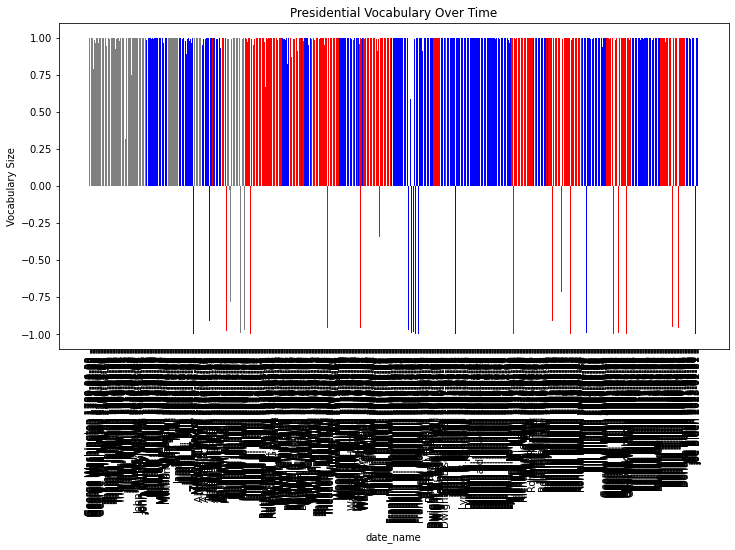

In [19]:
# plotting the sentiment scores for each date_name
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
party_colors = {
    'Democratic': 'blue',
    'Republican': 'red',
    'Others':'gray'
}

plt.figure(figsize=(12, 6))
plt.bar(df['date_name'], df['sentiment_score'], color=df['political_party_category'].map(party_colors))
plt.xlabel('date_name')
plt.ylabel('Vocabulary Size')
plt.title('Presidential Vocabulary Over Time')
plt.xticks(rotation=90)
plt.show()

In [20]:
# mean sentiment score for each political party
party_mean_sentiment = df.groupby('political_party_category')['sentiment_score'].mean()

# party with the highest mean sentiment score
highest_mean_party = party_mean_sentiment.idxmax()
highest_mean_score = party_mean_sentiment.max()

print(f"The political group with the highest mean sentiment score is {highest_mean_party} with a mean score of {highest_mean_score:.2f}")


The political group with the highest mean sentiment score is Others with a mean score of 0.92


In [21]:
positive_sentiment=df.groupby(['political_party_category','name'])
max_sentiment=positive_sentiment['sentiment_score'].max()
max_sentiment

political_party_category  name                 
Democratic                Andrew Jackson           1.0000
                          Barack Obama             1.0000
                          Bill Clinton             1.0000
                          Franklin D. Roosevelt    0.9999
                          Franklin Pierce          1.0000
                          Grover Cleveland         1.0000
                          Harry S. Truman          1.0000
                          James Buchanan           1.0000
                          James K. Polk            1.0000
                          Jimmy Carter             1.0000
                          Joe Biden                0.9999
                          John F. Kennedy          1.0000
                          Lyndon B. Johnson        1.0000
                          Martin Van Buren         1.0000
                          Woodrow Wilson           1.0000
Others                    Andrew Johnson           1.0000
                        

Here, there are 1.0 sentiment score for many presidents in each group. 
The above is the list of top presidents with high positive sentiment score.